In [1]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [2]:
# label: true = 0, fake = 1

In [6]:
experiment_name = "qwen_0.5b_test"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [7]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [8]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1209
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 152
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 151
    })
})

In [9]:
fake_train_dataset['train'][0]

{'text': "By now, we have all heard the allegations made by numerous women that Bill Cosby sexually assaulted them. At least 15 have accused him of abuse, with the first incident in the late 1960s and the last in 2004. While his attorneys have denied most of these assertions, Cosby has publicly refused to comment. In fact just a few weeks ago, Cosby not only declined to answer an Associated Press reporter's question about the claims, he told the reporter that he would appreciate it if any reference to the",
 'label': 0}

In [10]:
print(fake_train_dataset['train'][0]['text'])

By now, we have all heard the allegations made by numerous women that Bill Cosby sexually assaulted them. At least 15 have accused him of abuse, with the first incident in the late 1960s and the last in 2004. While his attorneys have denied most of these assertions, Cosby has publicly refused to comment. In fact just a few weeks ago, Cosby not only declined to answer an Associated Press reporter's question about the claims, he told the reporter that he would appreciate it if any reference to the


In [11]:
fake_train_dataset['train'][2]

{'text': 'Stuart Lancaster has been urged to throw Danny Cipriani into a limbo to prove he’s not just a bad coach. And then there’s the question of whether the team he’s assembled should be the new England manager. If he’s to be given the job, the man with 14 years’ experience at the helm of the club will need to prove his worth, as well as his abilities in the dressing room. As the club’s new boss is still being interviewed for the job, there’s a growing chorus of questions about whether the 46-year-old’',
 'label': 1}

In [12]:
print(fake_train_dataset['train'][2]["text"])

Stuart Lancaster has been urged to throw Danny Cipriani into a limbo to prove he’s not just a bad coach. And then there’s the question of whether the team he’s assembled should be the new England manager. If he’s to be given the job, the man with 14 years’ experience at the helm of the club will need to prove his worth, as well as his abilities in the dressing room. As the club’s new boss is still being interviewed for the job, there’s a growing chorus of questions about whether the 46-year-old’


In [13]:
" By . Hugo Gye . PUBLISHED: . 06:53 EST, 12 March 2013 . | . UPDATED: . 06:53 EST, 12".split("EST,")

[' By . Hugo Gye . PUBLISHED: . 06:53 ',
 ' 12 March 2013 . | . UPDATED: . 06:53 ',
 ' 12']

In [14]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,"By now, we have all heard the allegations made...",0
1,Casey Anthony could be at risk of 'disappearin...,0
2,Stuart Lancaster has been urged to throw Danny...,1
3,Farmers' subsidies: The money is being clawed ...,1
4,An aristocrat's son has died while in police c...,1


In [15]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


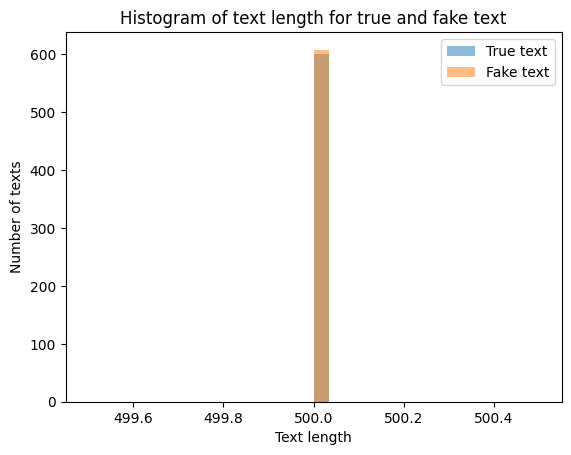

In [16]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [149]:
# print text where length is greater than 2000
print(fake_train_df[fake_train_df["text"].apply(len) > 2000]["text"].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [150]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [83]:
fake_train_df.describe()

,label
count,16.000000
mean,0.500000
std,0.516398
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [84]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [62]:
fake_train_df.head(20)

,text,label
0,Instruction: \n Write a funny and whimsical h...,0
1,Instruction: \n If McDonald’s were to go out ...,1
2,Instruction: \n what is the difference betwee...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Who was the first person to d...,0
5,Instruction: \n What was most important inven...,1


In [33]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 386.2857142857143
Average size of text with label 1 (=Fake text): 393.5


In [38]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


223.75

In [15]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


8.133333333333333

In [44]:
# find filtering such that wasserstein distance is minimized
wasserstein_distances = []
for i in range(300, 1000, 100):
    fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < i]
    true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
    fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)
    wasserstein_distances.append({"threshold": i, "wasserstein_distance": wasserstein_distance(true_text_lengths, fake_text_lengths)})
wasserstein_distances


[{'threshold': 300, 'wasserstein_distance': 47.666666666666664},
 {'threshold': 400, 'wasserstein_distance': 66.0},
 {'threshold': 500, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 600, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 700, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 800, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 900, 'wasserstein_distance': 100.49999999999999}]